In [ ]:
# pip install control
# pip install ddcontrol
import control as ct    # Control systems library
import random          # For generating random numbers
import numpy as np
import matplotlib.pyplot as plt

### Standard State-Space Representation

<!-- <p align="center">  -->
<center>

$\dot{x}(t)$ = A x(t) + B u(t)

y(t) = C x(t) + D u(t)

</center>

### Meaning of Symbols

| Symbol | Description | Dimensions | Notes |
|---------|--------------|-------------|-------|
| **x(t)** | State vector | n × 1 | Represents internal variables that describe the system’s dynamic behavior. |
| **u(t)** | Input vector | m × 1 | External input or control signal applied to the system. |
| **y(t)** | Output vector | p × 1 | Measured or observed variables of interest. |
| **A** | System (state) matrix | n × n | Describes how the system’s states evolve over time (internal dynamics). |
| **B** | Input (control) matrix | n × m | Determines how control inputs affect the system states. |
| **C** | Output (observation) matrix | p × n | Maps internal states to the measured outputs. |
| **D** | Feedthrough (direct) matrix | p × m | Represents any instantaneous (direct) effect of the input on the output; zero for strictly proper systems. |


In [ ]:
# Generating a random state-space system
system = ct.rss(states=1, outputs=1, inputs=1, strictly_proper=True)
print("Random State-Space System:\n", system)

Random State-Space System:
 <StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']

A = [[-0.37978612]]

B = [[0.66318428]]

C = [[-1.58312765]]

D = [[0.]]


### Standard Transfer Function Representation

<center>

$G(s) = \frac{Y(s)}{U(s)} = \frac{b_m s^m + b_{m-1}s^{m-1} + \dots + b_1 s + b_0}{a_n s^n + a_{n-1}s^{n-1} + \dots + a_1 s + a_0}$

</center>



### Meaning of Symbols

| Symbol | Description | Notes |
|---------|--------------|-------|
| **G(s)** / **G(z)** | Transfer function | Ratio of output to input in Laplace (s) or Z-domain. |
| **Y(s)** / **Y(z)** | Output variable (Laplace / Z-transform of output) | Represents the system’s response. |
| **U(s)** / **U(z)** | Input variable (Laplace / Z-transform of input) | Represents the applied input signal. |
| **b₀, b₁, …, bₘ** | Numerator coefficients | Define the zeros and gain of the system (input-to-output relation). |
| **a₀, a₁, …, aₙ** | Denominator coefficients | Define the poles and stability of the system. |
| **m, n** | Polynomial orders | Typically, \( n ≥ m \) for a physically realizable (proper) system. |
| **s** | Laplace variable | Continuous-time frequency variable (\( s = σ + jω \)). |
| **z** | Z-transform variable | Discrete-time equivalent of \( s \). |


In [ ]:
# Converting to Transfer Function representation
tf_system = ct.ss2tf(system)
print("\nTransfer Function Representation:\n", tf_system)


Transfer Function Representation:
 <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    -1.05
  ----------
  s + 0.3798


### Poles and Zeros of a Transfer Function

- **Zeros**: The values of \(s\) that make the numerator zero.

- **Poles**: The values of \(s\) that make the denominator zero.
  These determine the **stability** and **dynamic behavior** of the system.

# Example System
### 1. Simple liquid tank system:
<center>

$\frac{dh(t)}{dt} = -\frac{h(t)}{\tau} + K_p \, u(t)$


</center>

- h(t) = Liquid level (state/output)  
- u(t) = Inlet flow rate (input)  
- $\tau$ = Time constant of the tank  
- $K_p$ =Process gain

### Transfer Function
<center>

$G(s) = \frac{H(s)}{U(s)} = \frac{K_p}{\tau s + 1}$

</center>

In [ ]:
# Transfer Function Representation:

Kp = 0.8
tau = 50
G = ct.tf([Kp], [tau, 1])
print("\nPlant G(s):\n", G)


Plant G(s):
 <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    0.8
  --------
  50 s + 1


# Open Loop simulation

Response of the system to the input (If its a unit step input, it is called step response). Helps to study the transient behaviour, stability, response to disturbance etc.

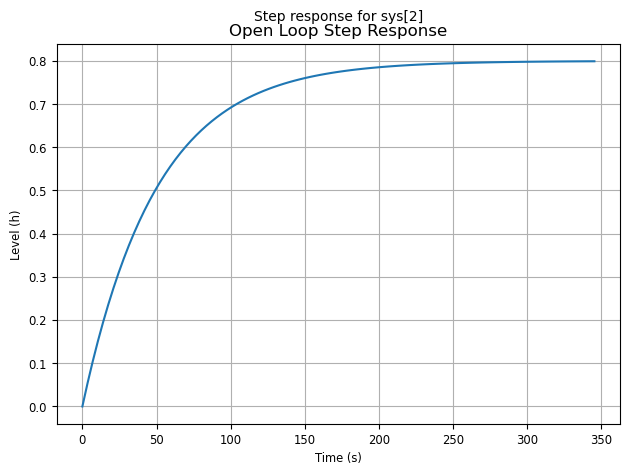

In [ ]:
# Open loop simulation (Step response)
cplt = ct.step_response(G).plot()
plt.title("Open Loop Step Response")
plt.xlabel("Time (s)")
plt.ylabel("Level (h)")
plt.grid()
plt.show()


In [ ]:
# Step info
info = ct.step_info(G)
print("\nStep Response Info:\n", info)


Step Response Info:
 {'RiseTime': 111.64048935728707, 'SettlingTime': 198.8596216676676, 'SettlingMin': 0.7253917322493425, 'SettlingMax': 0.8, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.7991999999999999, 'PeakTime': 345.38776394910684, 'SteadyStateValue': 0.8}


![image.png](attachment:image.png)

| Parameter | Meaning | Interpretation |
|------------|----------|----------------|
| **RiseTime** | Time taken for the output to rise from 10% to 90% of its final (steady-state) value | Indicates how **fast** the system responds initially |
| **SettlingTime** | Time taken for the output to stay within a small tolerance band (usually ±2%) around its steady-state value | Shows how long the system takes to **settle** after transients |
| **SettlingMin** | Minimum output value during the settling region | Used to detect **undershoot** or oscillations below steady-state |
| **SettlingMax** | Maximum output value during the settling region | Helps measure **overshoot** magnitude |
| **Overshoot** | Percentage by which the output exceeds its final steady-state value | Indicates how **aggressive or oscillatory** the response is |
| **Undershoot** | Amount by which the output falls below zero before settling | Seen in oscillatory or underdamped systems |
| **Peak** | Maximum value reached by the output response | Useful for determining overshoot magnitude |
| **PeakTime** | Time at which the **peak output** occurs | Shows how quickly the system reaches its maximum value |
| **SteadyStateValue** | Final output value as time → ∞ | Expected steady-state gain of the system for a unit step input |


### 2. First Order Plus Dead Time (FOPDT)
The output does not immediately respond to an input change — there’s a fixed delay before any effect is seen.

<center>

$G(s) = \frac{K_p \, e^{-\theta s}}{\tau s + 1}$

</center>

Pade Approximation is used to approximate the time delay term as a ratio of polynomials

<center>

$e^{-\theta s} \approx \frac{1 - \frac{\theta s}{2} + \frac{(\theta s)^2}{12}}{1 + \frac{\theta s}{2} + \frac{(\theta s)^2}{12}}$

</center>

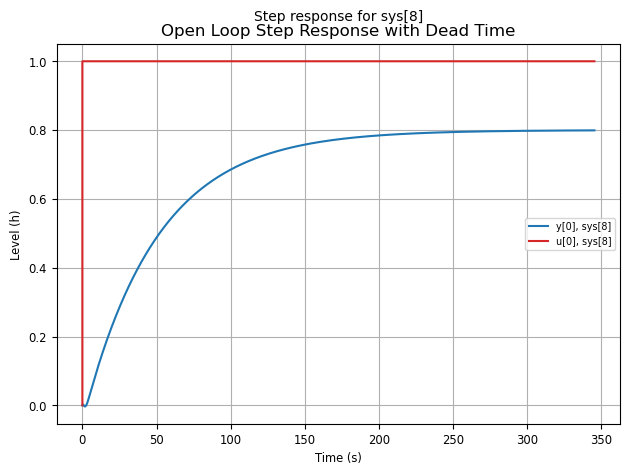


Step Response Info with Dead Time:
 {'RiseTime': 109.92749304417795, 'SettlingTime': 198.72570664644732, 'SettlingMin': 0.720134655165976, 'SettlingMax': 0.8, 'Overshoot': 0.0, 'Undershoot': 0.41546164491692267, 'Peak': 0.7991505307636662, 'PeakTime': 345.38776394910684, 'SteadyStateValue': 0.8}


In [ ]:
Kp = 0.8
tau = 50
theta = 3.0   # dead time (s)

# Adding time delay using Pade approximation
num_delay, den_delay = ct.pade(theta, 2)  # 2nd order Pade approximation
delay = ct.tf(num_delay, den_delay)

# Complete system with delay
G_delay = G * delay

# Open loop simulation (Step response)
cplt_delay = ct.step_response(G_delay).plot(plot_inputs='overlay', overlay_signals=True, overlay_traces=True)
plt.title("Open Loop Step Response with Dead Time")
plt.xlabel("Time (s)")
plt.ylabel("Level (h)")
plt.grid()
plt.show()

# Step info
info_delay = ct.step_info(G_delay)
print("\nStep Response Info with Dead Time:\n", info_delay)



### 3. Inverse Response System
The output first moves in the opposite direction of what you expect when an input (like a step change) is applied — and only later moves in the correct direction toward its final value.

Example system: $G(s) = \frac{1 - 2s}{5s + 1}$


Inverse Response System G(s):
 <TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -2 s + 1
  --------
  5 s + 1


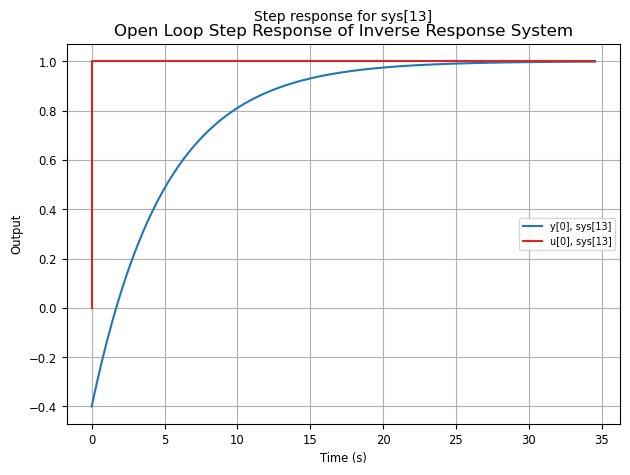


Step Response Info of Inverse Response System:
 {'RiseTime': 10.815172406487184, 'SettlingTime': 21.281468283732845, 'SettlingMin': 0.9012327676499393, 'SettlingMax': 1.0, 'Overshoot': 0.0, 'Undershoot': 40.0, 'Peak': 0.9986000000000005, 'PeakTime': 34.538776394910684, 'SteadyStateValue': 1.0}


In [ ]:
# Inverse Response System
G_inv = ct.tf([-2, 1],[5, 1])
print("\nInverse Response System G(s):\n", G_inv)

# Open loop simulation (Step response)
cplt_inv = ct.step_response(G_inv).plot(plot_inputs='overlay', overlay_signals=True, overlay_traces=True)
plt.title("Open Loop Step Response of Inverse Response System")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid()
plt.show()

# Step info
info_inv = ct.step_info(G_inv)
print("\nStep Response Info of Inverse Response System:\n", info_inv)

### Second Order System and Damping

A standard **second-order system** can be represented as:
<center>

$G(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}$

</center>

Where:  
- $\omega_n $ = Natural frequency (rad/s)  
- $\zeta$ = Damping ratio  

### Damping

- It is the effect in a dynamic system that **reduces the amplitude of oscillations** over time.  
- It represents the system’s ability to **dissipate energy** and gradually bring the system to **steady-state** without sustained oscillations.


| Damping Type | Condition | Step Response Behavior |
|--------------|-----------|----------------------|
| **Undamped** | $\zeta$ = 0  | Pure oscillation, amplitude does not decay |
| **Underdamped** | 0 < $\zeta$ < 1  | Oscillatory, amplitude gradually decays to steady-state |
| **Critically Damped** |$\zeta$ = 1 | Fastest response without oscillation |
| **Overdamped** |$\zeta$ > 1| Slow response, no oscillation, gradual rise to steady-state |


Undamped (ζ=0):
<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     4
  -------
  s^2 + 4

Underdamped (ζ=0.3):
<TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         4
  ---------------
  s^2 + 1.2 s + 4

Critically Damped (ζ=1):
<TransferFunction>: sys[22]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        4
  -------------
  s^2 + 4 s + 4

Overdamped (ζ=2):
<TransferFunction>: sys[24]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        4
  -------------
  s^2 + 8 s + 4



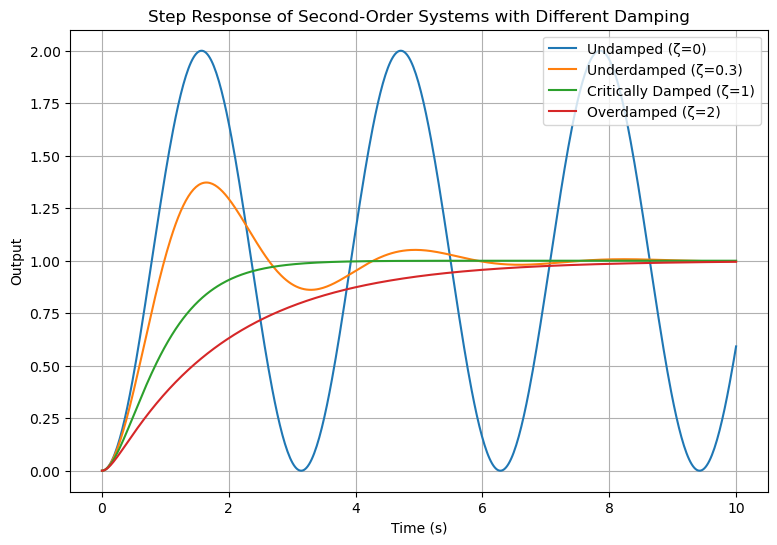

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Natural frequency
wn = 2.0  # rad/s

# Damping ratios for demonstration
zeta_values = [0, 0.3, 1.0, 2.0]
labels = ['Undamped (ζ=0)', 'Underdamped (ζ=0.3)', 'Critically Damped (ζ=1)', 'Overdamped (ζ=2)']

# Time vector
T = np.linspace(0, 10, 500)

plt.figure(figsize=(9,6))

for zeta, label in zip(zeta_values, labels):
    # Second-order system
    numerator = [wn**2]
    denominator = [1, 2*zeta*wn, wn**2]
    G_2nd = ct.tf(numerator, denominator)

    # Print the transfer function
    print(f"{label}:")
    print(G_2nd)
    print()

    # Step response
    T, y = ct.step_response(G_2nd, T)
    plt.plot(T, y, label=label)

plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response of Second-Order Systems with Different Damping')
plt.grid(True)
plt.legend()
plt.show()



### Observations from Step Response

- **Undamped ($\zeta$=0)** = system oscillates indefinitely; no settling.  
- **Underdamped (0<$\zeta$<1)** = oscillates with decreasing amplitude; eventually settles at steady-state.  
- **Critically damped ($\zeta$=1)** = reaches steady-state quickly without overshoot.  
- **Overdamped ($\zeta$>1)** = rises slowly to steady-state; no overshoot.  

### General form of the PID controller

<center>

$C(s) = K_c \left[ 1 + \frac{1}{T_i s} + T_d s \right]$

</center>

Where:  
- $K_c$ = Proportional gain  
- $T_i$ = Integral time constant  
- $T_d$ = Derivative time constant  
- $s$ = Laplace variable

In [ ]:
# Designing a PID controller using Ziegler-Nichols method
Kc = 100
c_p = ct.tf([Kc], [1])  # Proportional

# Closed loop transfer function (unity feedback)
sys_cl = ct.feedback(c_p * G, 1)

print("\nClosed-Loop System with P Controller:\n", sys_cl)



Closed-Loop System with P Controller:
 <TransferFunction>: sys[29]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     80
  ---------
  50 s + 81


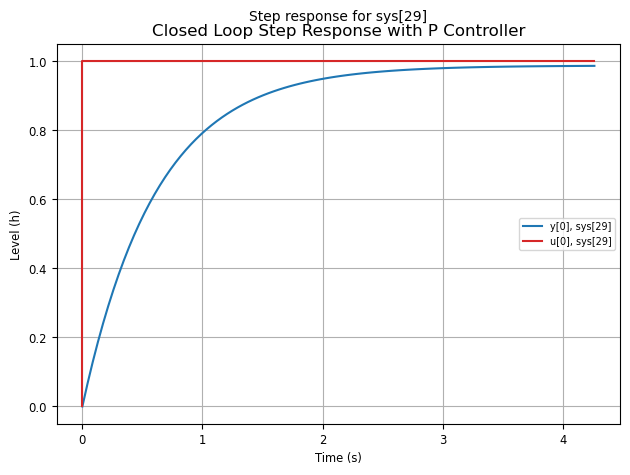

In [ ]:
# Step response
CL_P = ct.step_response(sys_cl).plot(plot_inputs='overlay', overlay_signals=True, overlay_traces=True,)
plt.title("Closed Loop Step Response with P Controller")
plt.xlabel("Time (s)")
plt.ylabel("Level (h)")
plt.grid()
plt.show()

In [ ]:
# Step info
info_P = ct.step_info(sys_cl)
print("\nClosed-Loop Step Response Info with P Controller:\n", info_P)


Closed-Loop Step Response Info with P Controller:
 {'RiseTime': 1.3352064699366895, 'SettlingTime': 2.4550570576255257, 'SettlingMin': 0.8888888888888893, 'SettlingMax': 0.9876543209876543, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.9866666666666666, 'PeakTime': 4.264046468507492, 'SteadyStateValue': 0.9876543209876543}


Explanation:
- The proportional term scales the error directly.
- Increasing Kc reduces steady-state error but may cause oscillations.
- Notice that there is still a small offset at steady state.


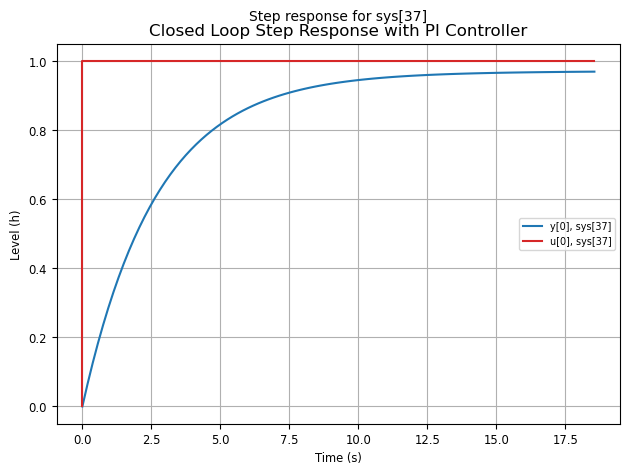

In [ ]:
# PI controller design using Ziegler-Nichols method ultimate gain and period
Ku = 50  # Ultimate gain
Pu = 150  # Ultimate period
kc_PI = 0.45 * Ku
Ti_PI = Pu / 1.2

# PI controller
c_pi = ct.tf([kc_PI * Ti_PI, kc_PI], [Ti_PI, 0])

CL_PI = ct.feedback(c_pi * G, 1)
t2, y2 = ct.step_response(CL_PI)
cplt = ct.step_response(CL_PI).plot(plot_inputs='overlay', overlay_signals=True, overlay_traces=True,)
plt.title("Closed Loop Step Response with PI Controller")
plt.xlabel("Time (s)")
plt.ylabel("Level (h)")
plt.grid()
plt.show()


In [ ]:
# System Info
info_PI = ct.step_info(CL_PI)
print("\nClosed-Loop Step Response Info with PI Controller:\n", info_PI)


Closed-Loop Step Response Info with PI Controller:
 {'RiseTime': 6.935103767054459, 'SettlingTime': nan, 'SettlingMin': 0.9046275622290163, 'SettlingMax': 1.0, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.9698902809023769, 'PeakTime': 18.556088457794363, 'SteadyStateValue': 1.0}


Explanation:
- The integral term adds memory of past errors.
- It eliminates the steady-state offset left by proportional control.
- But it also slows the system and may add overshoot.

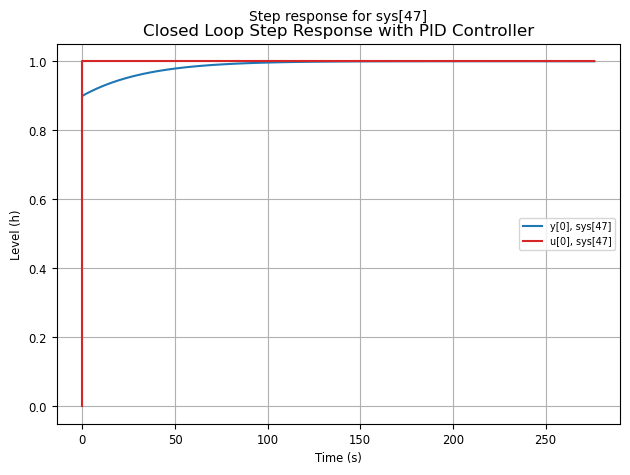

In [ ]:
# PID controller design using Ziegler-Nichols method ultimate gain and period
kc_PID = 0.6 * Ku
Ti_PID = Pu / 2
Td_PID = Pu / 8

# PID controller
c_pid = ct.tf([kc_PID * Td_PID * Ti_PID, kc_PID * Ti_PID, kc_PID], [Ti_PID, 0])

CL_PID = ct.feedback(c_pid * G, 1)
t3, y3 = ct.step_response(CL_PID)  #t3= time vector, y3= response
cplt = ct.step_response(CL_PID).plot(plot_inputs='overlay', overlay_signals=True, overlay_traces=True,)
plt.title("Closed Loop Step Response with PID Controller")
plt.xlabel("Time (s)")
plt.ylabel("Level (h)")
plt.grid()
plt.show()



### Controller Performance
#### Definitions

1. **ISE (Integral of Squared Error)**  

$ISE = \int_0^\infty e^2(t) \, dt$

- Squared error is **weighted heavily for large deviations**.  
- Lower ISE → smaller overall error magnitude.  

2. **IAE (Integral of Absolute Error)**  

$IAE = \int_0^\infty |e(t)| \, dt$

- Absolute error measures **overall deviation**, without squaring.  
- Less sensitive to large peaks than ISE.  

3. **ITAE (Integral of Time-weighted Absolute Error)**  

$ITAE = \int_0^\infty t \, |e(t)| \, dt$

- Errors **later in time** are penalized more heavily.  
- Helps **reduce long-term settling error** and oscillations.  


In [ ]:
# P, PI and PID controller performance comparison using ISE, IAE, ITAE
def performance_indices(t, y, setpoint=1):
    error = setpoint - y
    ISE = np.trapz(error**2, t)  # Integral of Squared Error
    IAE = np.trapz(np.abs(error), t)  # Integral of Absolute Error
    ITAE = np.trapz(t * np.abs(error), t)  # Integral of Time-weighted Absolute Error
    return ISE, IAE, ITAE
ise_P, iae_P, itae_P = performance_indices(*ct.step_response(sys_cl))
ise_PI, iae_PI, itae_PI = performance_indices(t2, y2)
ise_PID, iae_PID, itae_PID = performance_indices(t3, y3)
print(f"\nPerformance Indices:\n"
      f"P Controller: ISE={ise_P:.4f}, IAE={iae_P:.4f}, ITAE={itae_P:.4f}\n"
      f"PI Controller: ISE={ise_PI:.4f}, IAE={iae_PI:.4f}, ITAE={itae_PI:.4f}\n"
      f"PID Controller: ISE={ise_PID:.4f}, IAE={iae_PID:.4f}, ITAE={itae_PID:.4f}")



Performance Indices:
P Controller: ISE=0.3173, IAE=0.6619, ITAE=0.4854
PI Controller: ISE=1.4456, IAE=3.1759, ITAE=12.1817
PID Controller: ISE=0.1629, IAE=3.1516, ITAE=93.6719


### Controller Performance Interpretation

| Controller | Interpretation |
|------------|----------------|
| **P**      | Large errors overall; fast initial response but **steady-state error is high** and response may oscillate. |
| **PI**     | Smaller errors; **eliminates steady-state error**, smooth response, low oscillations. Balanced choice for most processes. |
| **PID**    | Very low squared error, fast rise, but **some late-time oscillations** may occur. |

Controller Selection Insight:

- P Controller: Simple, fast but less accurate; may have steady-state error.  
- PI Controller: Balanced; eliminates steady-state error and smooths the response. (Recommended for most applications)  
- PID Controller: Very fast response and minimal peak error but may introduce late-time oscillations.


In [ ]:
# Setpoint Change and Noise Simulation

T = np.linspace(0, 500, 1000)   # Extending the simulation time
SP = np.ones_like(T)            # default setpoint = 1 (creates an array of the same shape as T, filled with ones)
SP[T > 50] = 2                  # introduce a setpoint change at t=50 s

# Sensor noise
np.random.seed(42)              # reproducible noise
noise = 0.05 * np.random.randn(len(T))  # small Gaussian noise


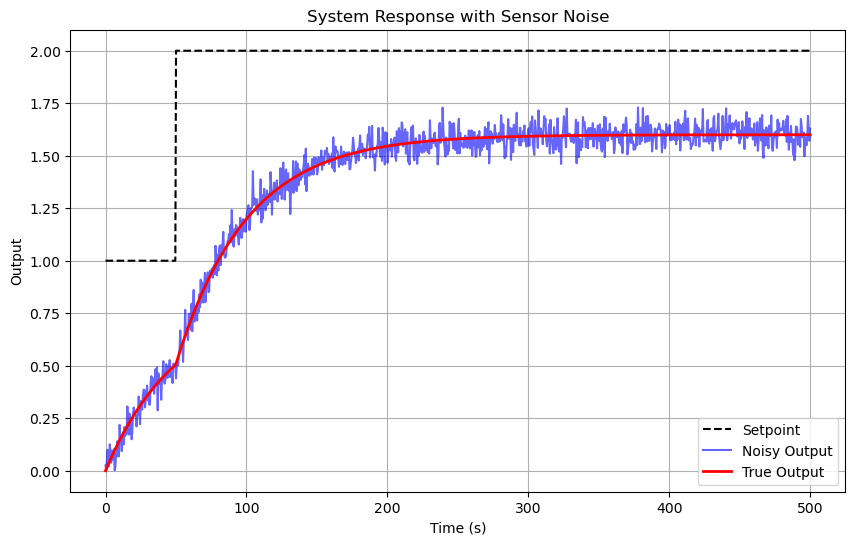

In [ ]:
# Forced response simulation with noise

t_out, y_out = ct.forced_response(G, T, SP)
y_noisy = y_out + noise         # add sensor noise
plt.figure(figsize=(10,6))
plt.plot(t_out, SP, 'k--', label='Setpoint', linewidth=1.5)
plt.plot(t_out, y_noisy, 'b', label='Noisy Output', alpha=0.6)
plt.plot(t_out, y_out, 'r', label='True Output', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Response with Sensor Noise')
plt.legend()
plt.grid()
plt.show()


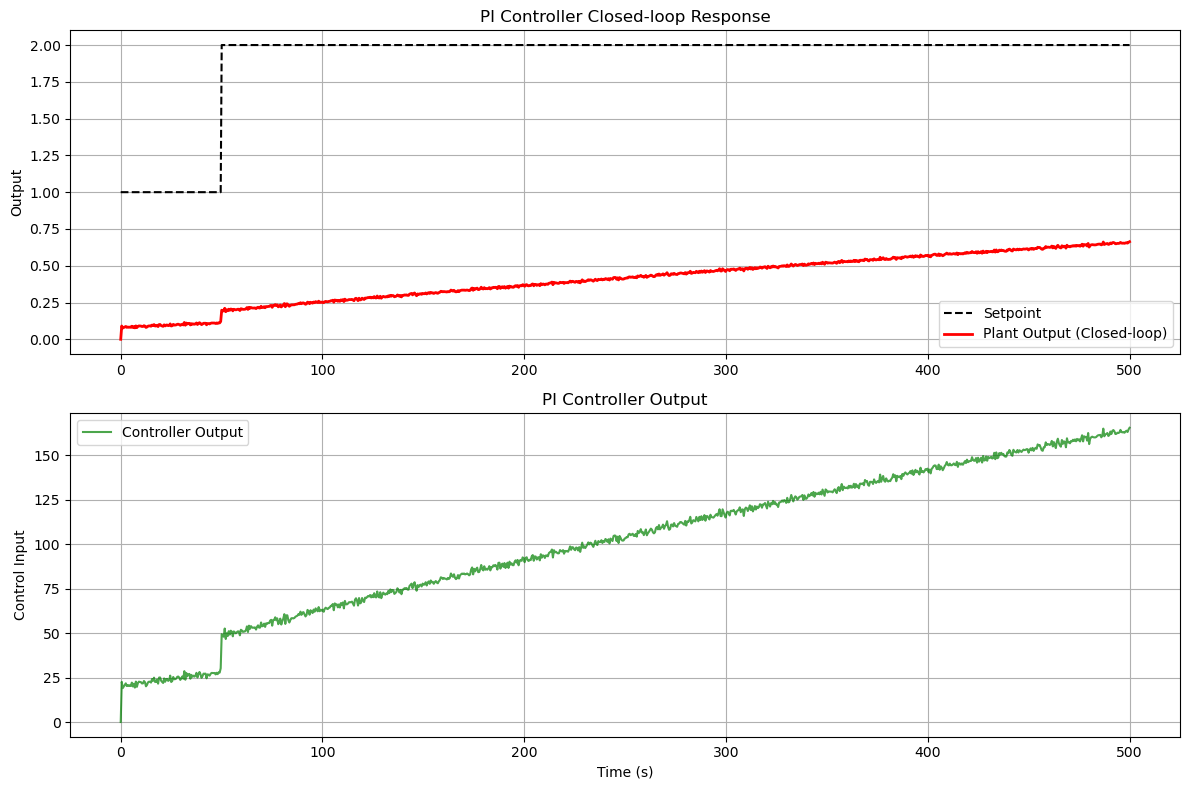

In [ ]:
# Time and setpoint
dt = T[1] - T[0]
noise_amplitude = 0.05

# Arrays for simulation
y = np.zeros_like(T)     # true plant output
u = np.zeros_like(T)     # controller output


# Initialize arrays
y = np.zeros_like(T)         # true plant output
y_noisy = np.zeros_like(T)   # measured output with noise
u = np.zeros_like(T)         # control input
integral = 0



for i in range(1, len(T)):
    # Controller computes control action based on previous noisy measurement
    error = SP[i] - y_noisy[i-1]
    integral += error * dt
    u[i] = kc_PI * (error + integral / Ti_PI)

    # Simulating response over small timestep
    t_step = [0, dt]
    t_out, y_step = ct.forced_response(G, t_step, [y[i-1], u[i]])
    y[i] = y_step[-1]  # true plant output at this timestep

    # Updating noisy measurement based on current plant output
    y_noisy[i] = y[i] + noise_amplitude * np.random.randn()

# --- Plot ---
# plt.figure(figsize=(10,6))
# plt.plot(T, SP, 'k--', label='Setpoint', linewidth=1.5)
# plt.plot(T, y_noisy, 'b', label='Noisy Measurement', alpha=0.6)
# plt.plot(T, y, 'r', label='Plant Output (Closed-loop)', linewidth=2)
# plt.plot(T, u, 'g', label='Controller Output', alpha=0.7)
# plt.xlabel('Time (s)')
# plt.ylabel('Output / Control')
# plt.title('PI Controller Closed-loop Response with Noisy Measurements')
# plt.legend()
# plt.grid()
# plt.show()

plt.figure(figsize=(12,8))

# Plot 1: Setpoint vs Plant Output
# plt.subplot(3, 1, 1)
plt.subplot(2, 1, 1)
plt.plot(T, SP, 'k--', label='Setpoint', linewidth=1.5)
plt.plot(T, y, 'r', label='Plant Output (Closed-loop)', linewidth=2)
plt.ylabel('Output')
plt.title('PI Controller Closed-loop Response')
plt.legend()
plt.grid()


# Plot 2: Controller Output
plt.subplot(2, 1, 2)
plt.plot(T, u, 'g', label='Controller Output', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Control Input')
plt.title('PI Controller Output')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### Reference
Follow the [link](https://python-control.readthedocs.io/en/0.10.2/examples/python-control_tutorial.html) for worked out examples

[Testbook](https://www.taylorfrancis.com/books/mono/10.1201/9780367433437/process-control-fundamentals-raghunathan-rengaswamy-babji-srinivasan-nirav-pravinbhai-bhatt?context=ubx&refId=51e2f242-e4ef-46a2-aa68-798ca1bcd0c3): Please use your smail IDs for accessing the book

**For those of you who wants to use MATLAB instead, basics notes and files has been uploaded to the course page**

#### Data driven PID controller design
Follow the [Link](https://ddcontrol.readthedocs.io/en/latest/#transfer-function-estimation-for-unknown-siso-system) for data driven PID controller desinging examples and installization instructions